<img src = "https://lh3.googleusercontent.com/pw/ACtC-3ceft_IUh0YAk09M215FsT0IleXVMI_eAOU8S0cFqHr32x7fxAERJ-WyLa3-r83d-e6e9MmE0k_hzDJeY1MgWGztbgoFNXYZyRclngcdHSkap4HXfBR0B03HdrFJt6PJBVBSlAdRV9lIDkzyyPucsHr=w1114-h202-no?authuser=0" width ="850" /></br>



### 편리하고 다양한 주가 확인 서비스 대시보드
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3fhrkR2B7FmTtYllAKXdNPaD2NXdvFuW5VwiR4684HK2ichyi6A7vhBT8pTmRfSFV8s6lzEt_iZ0mhHJec90XJphz3eGr44Oddlb3KOeFPoqRIbVDU54D4__co2K0ZiNss0j6hDluLUVK5x9t-GTJd3=w800-h450-no?authuser=0" width ="850" /></br>

### 개인 맞춤형으로 누리는 종목 추천 서비스 대시보드
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3dCnJClbtvPW_pAFAQNTKKxOSVPPMkjrRwl3GyB67j1VJKOvwOQwCdCbhtCbfPydRciICj6s43bAqwJQI8i1Q3Yx1gqCOZML3lcw0BF09t3rT-hEuTzAGfbYlz87ENHB6RFmkLyJOCs7Op5vK8v96d1=w1366-h768-no?authuser=0" width ="850" /></br>

### Y&Z세대 기준 EDA 대시보드
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3frDPsMyvbsEIclcA9f6iTV7oRu2nSw-rbOqIKvDK91gkwbP12tXqC60YLFgoHl4ZBXUEZC9sAZfHUbrgCs5fJSW1ZW5GlT4tatiAQNiVEWJkeFpGnOgNNg9SQmCxzBQlpBQVL0xTlCeXctCyssc0L0=w1366-h768-no?authuser=0" width ="850" /></br>

## 목차
0. **Import**
1. **data load & preprocessing**
2. **EDA : 탐색적 자료 분석**<br>
 1) 기본 EDA
3. **Profiling**<br>
 1) 종목 
    - YZ세대는 '비교적 덜 위험한' 주식을 선호할까? 
    - YZ세대는 '주가가 낮은' 주식을 선호할까?
    - YZ세대가 '주로 투자하는' 종목은 무엇일까?<br>

 2) 업종
    - YZ세대는 업종별로 뚜렷한 선호도가 있을까?
    - 2019 VS 2020 업종 변화 
4. **Service**<br>
 1) 가격대별 주식 추천 서비스<br>
 2) YZ세대 생활밀착형 종목추천서비스

-------------
## 0. Import

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import re
from datetime import datetime, timedelta
import konlpy.tag
from collections import Counter
from PIL import Image
import numpy as np
import random
from wordcloud import WordCloud, STOPWORDS
import datetime
import requests
import bs4
import warnings

warnings.filterwarnings(action='ignore') 

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic')

## 1. data load & preprocessing

In [ ]:
cus_df = pd.read_csv('2_cus_info.csv')
act_df = pd.read_csv('2_act_info.csv')
iem_df = pd.read_csv('2_iem_info.csv')
trd_kr_df = pd.read_csv('2_trd_kr.csv')
trd_oss_df = pd.read_csv('2_trd_oss.csv')

In [ ]:
df_kr = pd.merge(cus_df, pd.merge(pd.merge(act_df, trd_kr_df), iem_df))
df_oss = pd.merge(cus_df, pd.merge(pd.merge(act_df, trd_oss_df), iem_df))

In [ ]:
# 컬럼명 한국어로 바꾸기
df_kr.columns = ['고객번호', '성별', '연령대', '주소(시도)', '고객등급', '고객투자성향',
                 '계좌번호', '계좌개설월', '주문날짜', '주문순서', '주문접수시간대',
                 '최종체결시간대', '종목코드', '매매구분코드', '체결수량', '체결가격',
                 '주문매체구분코드', '종목영문명', '종목한글명']
df_oss.columns = ['고객번호', '성별', '연령대', '주소(시도)', '고객등급', '고객투자성향',
                 '계좌번호', '계좌개설월', '주문날짜', '주문순서', '주문접수시간대',
                 '최종체결시간대', '종목코드', '매매구분코드', '체결수량', '체결가격',
                 '주문매체구분코드', '거래통화코드', '거래통화환율', '종목영문명', '종목한글명']
df = df_kr.copy()

In [ ]:
# 세대 컬럼 추가
df['세대'] = 0
df.loc[df['연령대'].isin([00,20]), '세대']='1)Z'
df.loc[df['연령대'].isin([25,30,35]), '세대']='2)Y'
df.loc[df['연령대'].isin([40,45,50]), '세대']='3)X'
df.loc[df['연령대'].isin([55,60,65,70]), '세대']='4)B'

# 주문날짜 datetime 타입으로
df['주문날짜'] = df['주문날짜'].astype(str)
df['주문날짜'] = pd.to_datetime(df['주문날짜'], format = '%Y%m%d')

# 체결까지 걸린 시간
df['체결까지시간'] = df['최종체결시간대'] - df['주문접수시간대']

# 체결수량*체결가격
df['총가격'] = (df['체결수량'] * df['체결가격']).astype('int')

**외부데이터(코스닥, 코스피, 업종, 주요 제품) 활용**

In [ ]:
#코스피/코스닥, 업종 데이터 결합

# 종목코드 다운로드
def get_download_stock(market_type=None):
    stock_type = {'kospi': 'stockMkt', 'kosdaq': 'kosdaqMkt'}
    market_type = stock_type[market_type]
    download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download'
    download_link = download_link + '&marketType=' + market_type
    df = pd.read_html(download_link, header=0)[0]
    return df;

# 코스피 종목코드 다운로드
def get_download_kospi():
    df = get_download_stock('kospi')
    df.종목코드 = df.종목코드.map('{:06d}.KS'.format) # 6자리 코드로 맞춰주기
    return df

# 코스닥 종목코드 다운로드
def get_download_kosdaq():
    df = get_download_stock('kosdaq')
    df.종목코드 = df.종목코드.map('{:06d}.KQ'.format) # 6자리 코드로 맞춰주기
    return df

# 종목코드 목록 생성
def get_code():
    # 코스피, 코스닥 종목코드 각각 다운로드
    kospi_df = get_download_kospi()
    kosdaq_df = get_download_kosdaq()

    # 데이터프레임 합치기
    code_df = pd.concat([kospi_df, kosdaq_df])

    # 회사명과 종목코드만 추출
    code_df = code_df[['회사명', '종목코드']]

    # 컬럼명 변경
    code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})
    
    return code_df

# 종목코드 목록 인쇄
get_code()

k_code = get_code()
k_code['종목코드2'] = k_code['code'].str[:6] # merge하기 위해 KQ, KS가 없는 종목코드를 종목코드2에 저장

## 업종
code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
code.종목코드 = code.종목코드.map('{:06d}'.format) # 6자리 형식으로 포맷을 맞춰줌
code.rename(columns = {'종목코드' : '종목코드2'}, inplace = True)
code.tail()

merged_code = pd.merge(k_code,code,how='left',on='종목코드2')
merged_code = merged_code[['name','code', '종목코드2', '업종', '주요제품']]
# merged_code.isna().sum() # null값이 있음

df['종목코드2'] = df['종목코드'].str[1:]
df['종목코드2'] = df['종목코드2'].str.strip() # 공백 제거
df['종목한글명'] = df['종목한글명'].str.strip()

df = pd.merge(df,merged_code,how='left',on='종목코드2')

df['코스피코스닥'] = df['code'].str[-2:] # 코스피/코스닥을 나타내는 열 생성
df.drop(['종목코드2', 'name','code'], axis = 1, inplace = True) # 필요없는 열 지우기

# 업종 분류 안 된 우선주 업종 분류
df.loc[df['종목한글명'] == '삼성전자1우선주', '업종'] = df[df['종목한글명'] == '삼성전자보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == 'SK케미칼1우선주', '업종'] = df[df['종목한글명'] == 'SK케미칼보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == '한진칼1우선주', '업종'] = df[df['종목한글명'] == '한진칼보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == 'SK증권1우선주', '업종'] = df[df['종목한글명'] == 'SK증권보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == '대한항공1우선주', '업종'] = df[df['종목한글명'] == '대한항공보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == '신풍제약1우선주', '업종'] = df[df['종목한글명'] == '신풍제약보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == 'SK1우선주', '업종'] = df[df['종목한글명'] == 'SK보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == '남선알미늄1우선주', '업종'] = df[df['종목한글명'] == '남선알미늄보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == '한화1우선주', '업종'] = df[df['종목한글명'] == '한화보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == '두산퓨얼셀1우선주', '업종'] = df[df['종목한글명'] == '두산퓨얼셀보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == '롯데지주1우선주', '업종'] = df[df['종목한글명'] == '롯데지주보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == 'LG화학1우선주', '업종'] = df[df['종목한글명'] == 'LG화학보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == '두산솔루스2우선주(신형)', '업종'] = df[df['종목한글명'] == '두산솔루스보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == '삼성SDI1우선주', '업종'] = df[df['종목한글명'] == '삼성SDI보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == '삼성중공업1우선주', '업종'] = df[df['종목한글명'] == '삼성중공업보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == '두산솔루스1우선주', '업종'] = df[df['종목한글명'] == '두산솔루스보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == '현대자동차1우선주', '업종'] = df[df['종목한글명'] == '현대자동차보통주']['업종'].reset_index(drop=True)[0]
df.loc[df['종목한글명'] == '두산퓨얼셀2우선주(신형)', '업종'] = df[df['종목한글명'] == '두산퓨얼셀보통주']['업종'].reset_index(drop=True)[0]

----------

## 2. EDA: 탐색적 자료 분석
</br>
데이터 전처리 : Python <br>
EDA : Tableau

### 세대별 계좌개설 연도
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3c2ex1BUja2EhNeU-9MK8ZbEGrXZIPG4KAH5QQq7C_jFdTeJdTSjngJisyA-ZFkHj7Gvib_82lUZB4-h3cq4rdxbDboSoRCuxysNhc4_KpVqH79MRxhVZK2KzMvAXP4dcNi7HekP9IMOzvskiJb-mCw=w1895-h1025-no?authuser=0" width ="800" /></br></br>
2015년 이후 전 세대의 계좌 개설이 증가했습니다.</br>
2018년부터 X&B 세대의 신규계좌 개설은 감소 추세지만, Y&Z세대는 다소 감소하는 구간이 있기는 하나, 증가하고 있음을 볼 수 있습니다.</br>
따라서 **우리는 계좌개설이 급격히 늘고있는 Y&Z세대를 주목해야 합니다.**

### 세대별 고객수 / 세대별 총금액
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3cKkGq4e3cL2QDxrch4SabgHoNOm9_vxSYSE3t1BVGnLmDl8Sp4kNXcJ5hc8IgTuMlg1mDMtQVt4Q5pjGLwzXbj5W0tGHkdHSS9scpcJ7r2ff-bch9RY-Xj5dgAD_hlxAP5aizlgbQvv6IMg7hBUWMS=w1941-h1078-no?authuser=0" width = 700/><img src = "https://lh3.googleusercontent.com/pw/ACtC-3f9iQA4Lebs2TdER6pBMN8t5vbTSLvzLEetDjVt_kcoyqSqAd_0LSe1HJgdZdyXMjT3jD3775VYa0EE77jNgi5I7xEpAKTaEesgNFNLXgJDXzL-xRBKFjQfl4qOyTYlHU6JE2j3FhE58IK_t7knadC6=w1906-h1080-no?authuser=0" width ="700" /></br></br>
세대별 고객 수와 총금액을 살펴보면, 고객수와 총 투자금액은 **X세대**가 가장 많고 B, Y, Z순으로 많은 것을 알 수 있습니다.<br>
기존 X&B세대는 자금이 Y&Z세대보다 상대적으로 많고, 일찍부터 주식을 시작했기 때문에 데이터의 분포에서도 그 차이가 뚜렷하게 보여집니다.

### 세대별 투자성향
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3epsDQ_j5fkmJTjlcqQj-QhLyY7bAc52xzCEgQ8fLoOXSB89WNgmIm-SAoi8n4JC58ZS1u8PznVclw1BtwUPABrGgIdLHAonipCtUfzNHy_QkW7MJzHtGbI6X30vByNdSP9I0aVJCDGWxaaOtkU4Ljl=w1774-h1063-no?authuser=0" width ="700" /><img src = "https://lh3.googleusercontent.com/pw/ACtC-3f0v-PAXYN3NPP2bDsxJPQDNCd_dcjBs3GiB0azP02esmnj811EVlsQYdgRU2K26prPytVCXN6wDrPs924ADzEah326C_0kmPObMgnOUFm6vf27fc2KxtNop91bUtdrjxkVlgh9dJF-1WT9GHOXFOWX=w1764-h1067-no?authuser=0" width ="700" /></br></br>
투자성향은 정보미제공과 해당사항없음을 제외하면, YZ세대는 '위험중립형'이 가장 많고 XB세대는 '적극투자형'이 많습니다.</br>
XB세대는 YZ에 비해 좀 더 left-skewed 형태로 보여집니다.

### 세대별 고객등급
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3erMW1x3A4idsvs_cZO6LC1YurJhHdsMXnT_XuX3faQaTGoHwdIgYityi6d8eDTcQbLFH41v0lpuYR748BSZglkjoSWw11PlGkCrtNMmdMLPPux9laB30BC1r-p0TzCxTwocnNV3tqbemIdkQKL2rBf=w360-h341-no?authuser=0" width ="380" /><img src = "https://lh3.googleusercontent.com/pw/ACtC-3dBW1lYN5JUTIXmqhmFxt6aX6IBqw2vdyIPtD01LfiLBVdBu2HcVQIz5CgocyTDHEFbrmcdmWssJskJxowekrAybmUn7OtqRSGENRMnuT-phlyQJEq3DwRxLdkSyDsGAb71Wz3HcWk_U_QgFg0GuSTb=w404-h352-no?authuser=0" width ="415" /></br></br>
고객등급은 YZ세대와 XB세대 모두 '그린'등급이 가장 많으며, YZ세대는 XB세대에 비해 '블루'등급의 비율이 높고 '골드'등급의 비율이 낮습니다.<br>
이를 통해 YZ가 XB세대에 비해 자본력의 차이가 있다는 것을 알 수 있습니다.

### 세대별 코스피/코스닥 총 투자금액
#### YZ세대</br>
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3cjoLTmAgR29owb-gC7uTQqYP6hNiI8Z8-dPYvYvuJ1vvnd3HD1XTJVHzlJRoDDsS3aqynqtxTBQqjpH17UH0mEDsPuxKQK02nclt30Pif10kL6Dhp1wD-Uqw3tUv-H1DkI5LCIi1NgdMSQqGEdE39u=w1766-h986-no?authuser=0" width ="700" /></br>
#### X세대
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3eOUGWGT35oM1TwgN7fnFzZIDLUeUSFTMANz1g71s8KQkuXneU-p0bkTmXbr2gL5vUnjl7dmvYnvikLWQiQIXlIenCwywYtVxvIAK5wi9uXKnsPV4PM3zx5KSRt1MZfMSbmPQGLOpzO3TfmaIDp0ON9=w1752-h996-no?authuser=0" width ="700" /></br>
#### B세대
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3f3nGjs3lY-eSPqV2Uy3LKnJ1ELjGFEjsgZfQvb7E2IJXEkAMpPf9VQd9KNrc5AiHsUVv0kYHCRZEJWnxGFVZpkg3h0N_8hA3HBxCn1dai79N4F4UeFNqZPMVgTMv2srwmVEqF5S450L6ZUNpJhH_23=w1780-h988-no?authuser=0" width ="700" /></br></br>
YZ세대와 X세대는 총 투자금액으로 봤을 때, **코스닥**에 상장되어 있는 기업에 더 많은 투자를 했지만 B세대는 **코스피**에 상장되어 있는 기업에 더 많은 투자를 했음을 알 수 있습니다.</br>


### 세대별 주문매체
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3eKhOddqX7D93vWPM6Va7j_WDVzRVq8SDl0fQEmm-qCtZMYuwmkKfg00B8KSqkWFZrOF_YlqqxgK3PejMwxigMBPsqWkXBeh5ZD1gbW30CNrrFcU1BmOyVEiAi44sogDaxScu2RC93p9Wjf0MRE6Mk-=w1949-h1037-no?authuser=0" width ="900" /></br>
전 세대에서 **MTS**를 가장 많이 쓰는 것으로 나타났지만, **특히 YZ세대에서 MTS를 사용하는 비율이 압도적이었습니다. **</br></br>
<u>따라서 YZ세대를 타겟팅하려면 MTS 서비스에 주목해야 함을 알 수 있습니다.</u>

## EDA 결론 : 
1. YZ세대가 XB세대보다는 고객 수가 적지만 개좌 개설이 급격히 늘어나고 있기 때문에 YZ세대를 타겟팅하는 전략이 필요합니다.
2. 투자성향 분포를 봤을 때, YZ세대는 XB세대에 비해 비교적 덜 위험한 주식을 찾을 가능성이 있습니다.
3. YZ세대는 그린, 블루 등급의 비율이 높아 XB세대에 비해 비교적 자본이 많지 않다고 볼 수 있습니다.
4. YZ세대는 코스피보다 코스닥에 더 투자를 많이 편입니다.
5. MTS 비율이 압도적으로 높아, YZ를 사로잡기 위해서는 모바일 서비스에 주력할 필요가 있습니다.<br>
------------

## 💡 그렇다면, YZ세대는 정말 '비교적 덜 위험한' 주식을 선호할까요?? 매수총금액 기준 상위 종목들을 통해 알아보겠습니다.

# 3. Profiling

### 세대별 TOP 매수 총금액 종목
#### YZ세대</br> 
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3fd6u-DWiWGtwfudF2RYzfgptZqYK7Qe9IA7Kg34m-tVJ5o8eQAPBBHUBCEuBg9JDMBtDIrHFu5pEbw0647DxB502t10ZVx18Bhch91DpFfmUDXDX9oYM9SdnNtFfn9iaDwGlMDT0qDJY9UBmon78NW=w1990-h941-no?authuser=0" width ="800" /></br>
종목을 살펴보면, YZ세대는 삼성관련 주식이 상위 4개를 차지하고 있는데, 그 중에서도 KODEX가 제일 많고 총 금액도 삼성전자보통주와 차이가 많이 나는 것을 알 수 있습니다.</br>
삼성 다음으로는 씨젠, 에이비엘바이오 등 제약 관련 주식을 많이 샀으며, 대한항공의 아시아나 인수와 관련한 한진칼보통주도 많이 매수했음을 알 수 있습니다.</br> <br>
**상위 10위까지는 삼성, 제약주, 항공(한진칼)**로 이루어져 있고, **씨젠을 제외하면 평균 체결가격은 10만원 이내로 싼 편이며, 가장 많이 산 삼성 KODEX 관련주는 1만원 이내**입니다.</br>
#### X세대</br> 
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3dy-w29YnqlfbmsYQ1Eu5mfxtYZ4N_ySM69bBY2ce3UdVUQVkZ_qqO4BJYz5xcBKp8H6sOydB_7AMyrkSOXc_fx7V8lDgYXmWYGB_Lb44ryp8Tk_XWKOn9EGJcZi5nY7p2s24d0j-XBzA7BLXfc6e3g=w1986-h979-no?authuser=0" width ="800" /></br>
X세대도 마찬가지로 삼성관련주가 상위3위까지 차지하고 있습니다.</br> 
YZ세대와 다른 점이라면, YZ세대의 1위였던 삼성KODEX 코스닥 150 레버리지가 최상위권에 없다는 것입니다.</br>
이어서 4위는 셀트리온보통주 (YZ세대는 18위) , 5위는 한진칼보통주, 6위는 삼성바이오로직스입니다. <br> 크게 보이는 특징은, **상위 10위는 삼성, 제약주, 항공(한진칼), 철강(포스코)로 이루어져 있으며 셀트리온, 삼성바이오로직스, 포스코 등 상대적으로 비싼 주식들이 순위권에 있다는 점입니다.**</br>
#### B세대</br> 
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3cJY1H8oBr7i-l0Fv5iMCMY2OBM1WLA4lIXe1T1n4ftmj0LdG5jGoq1jR_KwV5CAlvZlQx-qp8w-DDBrjX809xOs4hnJ75X9d26563WeplydtbAgWnCbc423GRiLXSffrOccK3meGL5G_T5sjqacHF_=w1972-h977-no?authuser=0" width ="800" /></br>
B세대는 앞선 두 세대와 다르게 삼성KODEX 관련 주식들이 최상위권에 있지 않았습니다.</br>
물론 삼성전자보통주는 2위로 여전히 높은 순위였지만 1위가 셀트리온보통주, 3위가 현대자동차보통주로 XYZ와는 상당히 다른 양상을 보였습니다.</br>
**10위권 내에는 제약, 삼성전자/전기, 자동차, 반도체, 건설, IT로 이루어져 있어 다른 세대들에 비해 다양한 업종들을 포함합하고 있는 것을 볼 수 으며,** 가격도 **7만원대~30만원대의 주식**들이 최상위권에 있어 YZ세대에 비해 비싼 주식들을 많이 사는 것을 알 수 있습니다.


>매수총금액 기준으로 상위 종목들을 살펴보니, YZ세대가 KODEX, 삼성 관련 주식을 다른 세대에 비해 많이 매수하는 것으로 나타났습니다. 따라서 **비교적 안정적인 주식을 선호하는 경향이 존재**한다는 것을 확인할 수 있습니다.<br>
그리고, YZ세대는 비교적 저렴한 주식을 많이 사고 XB세대는 비싼 주식을 많이 사는 경향이 일부 보이는 것 같습니다.

--------------

## 💡 그렇다면 YZ는 저렴한 주식을, XB세대는 상대적으로 비싼 주식을 많이 사는지 확인해보겠습니다.

### 세대별 체결가격대별 구성비율
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3fhattliBKyLaNJHS6_srkAYEy2djtx4TgFScHBZFK10nQ5sDSk71rERNoIpdXP3FDd_fAPySexEQkEoryc_942f8eyMRXv-yGtBd516ugVM4pAIU5-v07Mt9BFrO1Wro3Yklewik6iauPRXrJrZCDR=w1917-h1058-no?authuser=0" width ="900" /></br>

각 세대별 체결가격대 구성비율을 보면, 모든 세대에서 10만원 이하의 주식이 가장 많은 비율을 차지했습니다. **B세대는 특히 10만원 이상의 주식을 다른 세대들에 비해 많이 매수하는 것을 알 수 있었으며,**</br> X세대도 B세대만큼은 아니지만, YZ세대에 비해 10만원 이상의 주식을 많이 매수하는 것으로 나타났습니다.</br>

### 세대별 평균체결가격 대비 총금액
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3cM2Q5GYZHYG3FsltV9gtc1evR8FlElNe7G8_K7brn-N79wext3SU6KJCiRg4rLs26YegPeR5UZq5LflUe0S0NR9yi1baWDnGgR07RArBSeyAqHXYE6d3ao_voDBfoiO4ezFDOLZNaspQhkE4ZlMWpj=w1886-h1013-no?authuser=0" width ="900" /></br></br>
실제 평균 체결가격과 총금액을 세대별로 비교해보면,</br>
**YZ세대는 낮은 가격대에서 많이 사고, 10만원을 넘어가면 XB세대만큼 해당 주식을 많이 사지 못한다는 것을 알 수 있습니다.**

> 이를 통해 **YZ세대는 다른 세대에 비해 가격이 저렴한 주식을 많이 매수하는 경향이 있다는 결론을 내릴 수 있으며,** 그 이유는 자금력이 부족하기 때문으로 추측할 수 있습니다.<br>


---------------

## 💡 앞선 매수 종목들을 살펴보면, 매수 상위권 내에서는 엄청난 차이가 나타나지는 않았습니다. 그렇다면, TOP매수 종목들 이외에, 세대별로 선호하는 종목들은 무엇일지 알아보고자 합니다. 

## YZ세대 / XB세대가 한 번이라도 투자를 한 종목
** YZ세대와 XB세대 각각의 종목별 투자비율('각 종목에 투자한 고객번호(고유카운트)' / '고객번호(고유카운트)')을 구한 후 두 세대 간 0.01만큼의 비율 차이가 나는 종목만 뽑아 YZ > XB이면 YZ가 주로 투자하는 종목, YZ<XB이면 XB가 주로 투자하는 종목으로 설정하였습니다.

### YZ세대가 주로 투자하는 종목
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3eyeotQXdQak2a8xJYWmiOj3lTZcSci4vufvxk4slelqMT0jgqK1pBNtpPFUYDGx_LmYdcBrZBNXBku7vNB9XJjebgU5ygsqHEgNy96GVth_AS2Ms743tj9FYyfIRpUKW-Y8qihkr5DI6ImkRtYhI1y=w590-h756-no?authuser=0" width ="400" /><img src = "https://lh3.googleusercontent.com/pw/ACtC-3ejzC6WdIXteVfQwmSihtO1rzKINX-FotsElo1FdqxzxgeDKaZ9CXqXkmEMWQiopICcQdiOsCVKkuKW_QA_1iMfXRkBYgc0G6JfoWVzJgDrjlTUQC11Gg5cTZB1tYdx8eJ5P76IPmnl9_KdMdE9vLUC=w588-h760-no?authuser=0" width ="400" /><img src = "https://lh3.googleusercontent.com/pw/ACtC-3dg2UiFDBjJiNyiLQk6RT-SRK1rK77QkgWCbMCofTx3SGEjX6BuHGAOEzSSCjNlsgvJBJlfTwSsxpjj0PWQZG0_bOnO0sPgAAggjhGxTxqQATFXYcivkHriMcIaChnkrzjJ-S-ALuUtOlGAzyg00hqt=w588-h759-no?authuser=0" width ="400" /></br></br>

YZ세대가 XB세대에 비해 많이 투자하는 종목은 위와 같았습니다. <br>
리스트를 봤을 때, YZ세대는 일상에서 많이 접할 수 있는 브랜드가 눈에 많이 띄었습니다.</br>
- *일상생활 속 품목 및 브랜드가 바로 연상되는 주식 :  호텔신라, 넥슨지티, CJ 씨푸드, SK텔레콤, 쌍용자동차, 제주항공, 비비안, 이마트, 강원랜드, 티웨이항공, 빙그레, CJ CGV*  <br> 
- *엔터테인먼트 주식 :  키이스트, JYP, YG*  <br> 
- *교육 관련 주식 :  메가엠디, 아이스크림에듀*<br> 

### XB세대가 주로 투자하는 종목
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3fJXCUyR7PmVX6twlZB45QiUdopHZqX62VJC3nmfSZNBraYS7wuzOsyagxyMB0BmfrDxNIImLa7B49HoYB6xqsMhbGJ0TrgGcOIg1G-MAp-U3y8vjRKbpCwdmsigspN2oCS6V6SMp1fcdiYgAHBYqeL=w588-h758-no?authuser=0" width ="400" /><img src = "https://lh3.googleusercontent.com/pw/ACtC-3eoAyVhLAJnDriGKi6Qvh4Mn85du-y2qKPUWMwCll9D2x9bW9kwRyQkjFYn87P7lOqppPBu9ozzLfwseQK7bxNtgjhDSEZdFZLEfnUESAFjwZVscIYanLUzXarz14kCtrubkRvtUtnjyGHXoSER-BFQ=w588-h601-no?authuser=0" width ="400" /></br></br>
XB세대가 YZ세대에 비해 많이 투자하는 종목은 위와 같았습니다. <br>
XB세대는 제약, 반도체, 공업 등 사회 전반의 주요한 업종들에 투자하지만, 주식 이름과 그 품목이 바로 연결되는 주식은 많이 없는 것을 알 수 있습니다.

## 종목 결론
1. YZ세대는 삼성KODEX 관련 주식이 1~3위에 위치한 것으로 봤을 때, 비교적 안정적인 주식을 많이 찾는 것으로 보입니다.
2. YZ세대는 10위권 내의 주식들을 비교했을 때 다른 세대들에 비해 비교적 저렴한 주식들을 선호하는 것으로 나타났습니다.
3. YZ세대는 XB세대에 비해 주식 이름로 인해 그 브랜드나 품목이 바로 연상되는 주식들에 관심이 많은 것으로 보여집니다.<br>

------------------

## 💡 종목 이외에도 업종별로 뚜렷한 선호도가 있는지 알아보겠습니다.

### 업종별 거래내역 카운트
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3fC6QOiPNSPK8uFyIKXy06eha7M3KQfdD_6CeuXGFR9AEgnNQiXbQdUqMv1s7xkWbRYo1fllkdiIC0sHdk0zD-xZ0k0KFp5d8w4tH_haFHEIuVGeq44vRKc_ZoC8zWh2JkUxrgDI25p9fNqI2aqKReZ=w1438-h588-no?authuser=0" width ="700" /></br>
세대별 업종 거래내역을 카운트 해보면, **순위의 변동이 있을 뿐 상위권의 업종은 거의 비슷**했습니다. <br> 따라서 세대별로 업종의 선호에 큰 차이는 없는 것으로 결론지을 수 있는데, 매수총금액 상위 종목들과 연관지어 보면 삼성, 제약관련주, 카카오 등 인기종목의 영향을 많이 받기 때문으로 추측해볼 수 있습니다. 

### 2019년 대비 2020년 거래내역 증감
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3cV957eWj5FksTit3hNbnED8jBdn5UE07mbg8COaGw3KLA3SugkESAM7hHJfBc-htCShpiobpBtRxpOwaUNGRCHWrOMtVR5h07W7oRzL7osTLR37A70lEU5MWFe0_Ss-GeL36EEIikdVAc09u3mxgbC=w371-h511-no?authuser=0" width ="500" /></br>
2020년은 코로나19로 인해 많은 영향을 받은 해이기 때문에 선호 업종에 큰 차이가 있었을 것이라 생각하여 **2019년과 2020년의 거래내역 증감을 살펴보았습니다.**
매수총금액을 기준으로 정렬한 결과, 상위권의 업종은 대부분 전년도 대비 증가했고, 특히 **의약품 제조업, 의료용품 및 기타 의약 관련제조업, 일차전지 및 축전지 제조업이 100%이상 증가했습니다.**</br></br>
대부분이 증가한 것은 주식 시장 유입 인원의 증가와 활성화(코스피 및 코스닥 지수 상승), 코로나19 때문으로 해석할 수도 있을 것 같습니다.

## 날짜별 업종 증가추이
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3c6DrKO_bANcxnLXpHPEfT3S4Cja1K6epGkUSvgWUi1FFR9luWpIOJVO2ABWCuaYfglzuNv7n3Gqu9e38m26VR579zMEFmw2cc_a4ZRP7XSO4SZAYG3Iqdl9ooLGvKbBZm2e8_EhyEFsW1Hg3PaMIZt=w1992-h911-no?authuser=0" width ="900" /></br></br>
날짜별 증가 추이도 살펴보면, 2020년에 **의약품 제조업, 통신 및 방송 장비 제조업, 소프트웨어 개발 및 공급업**등이 급격히 증가했음을 알 수 있습니다.<br>

--------------------

## 💡 이렇듯 주식은 사회적 이슈 및 트렌드의 영향을 많이 받는데, 실제로 어떤 사회적 변화가 있어 2019년과 2020년의 차이를 가져온 것인지 워드클라우드를 통해 살펴보겠습니다. 

## 워드 클라우드
최근 투자의 동향에 대해 알아보기 위하여 네이버 금융의 뉴스 기사를 수집하여 가장 많이 나오는 단어에 대해 워드클라우드를 진행했습니다.

In [ ]:
days_range = []

start = datetime.datetime.strptime("2019-01-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-12-30", "%Y-%m-%d") # 범위 + 1
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    days_range.append(date.strftime("%Y%m%d"))

In [ ]:
for i in range(0, 730):
    datetime = days_range[i]
    for n in range(0,20):
        page = n
        url = f'https://finance.naver.com/news/news_list.nhn?mode=LSS3D&section_id=101&section_id2=258&section_id3=402&date={datetime}&page={page}'
        news = requests.get(url)     
        news_bs = bs4.BeautifulSoup(news.content, 'lxml')  
        news_list = news_bs.findAll('dd', class_="articleSubject")   
    
    for i in range(len(news_list)):     
        print(news_list[i].find('a').text)

In [ ]:
df2019 = pd.read_csv("./2019news_title.csv")
df2020 = pd.read_csv("./2020news_title.csv")

In [ ]:
# Text Cleaning
data_list = []

for k in range(len(df2019["title"])):
    title = re.sub('[^\w\s]',' ',df2019["title"][k])
    data = title
    data_list.append(data)
df2019_2 = pd.DataFrame(data_list, columns = ['title'])

data_list = []
for k in range(len(df2020["title"])):
    title = re.sub('[^\w\s]',' ',df2020["title"][k])
    data = title
    data_list.append(data)
df2020_2 = pd.DataFrame(data_list, columns = ['title'])

In [ ]:
okt = konlpy.tag.Okt()

data_list = []

for k in range(len(df2019_2["title"])):
    word_list = okt.nouns(df2019_2["title"][k])
    for word in word_list:
        data = word
        data_list.append(data)
        
df2019_3 = pd.DataFrame(data_list, columns = ['단어'])

data_list = []

for k in range(len(df2020_2["title"])):
    word_list = okt.nouns(df2020_2["title"][k])
    for word in word_list:
        data = word
        data_list.append(data)
        
df2020_3 = pd.DataFrame(data_list, columns = ['단어'])

In [ ]:
c2019 = Counter(df2019_3["단어"])
c2020 = Counter(df2020_3["단어"])

In [ ]:
stopword_list = ["할",'것', '시각','상승','하락', '마감','전일','대비','거래','종목'
                 ,'매수','수급','현재','최근','흐름','실적','주가','증권','시작','출발'
                ,'외국인', '하락', '증시', '코스피', '코스닥', '반등', '무역', '기관', '투자', '마켓', '뉴욕', '협상', '외환', '펀드', '유지', '매도', '신고', '기대'
                ,' 전망', '환율', '한국', '기업', '목표', '굿모닝', '달러', '개장', '개인', '증가', '주가', '시장', '주식', '주목', '성장', '내년'
                , '대감', '분석', '지속', '틈세', '국제', '우려', '일리', '실시간', '금융시장', '알파', '확률', '개선', '시도', '기록'
                , '확대', '회복', '상황', '이평', '배열', '상위', '글로벌', '상장', '전망', '등세', '추가']

# 불용어 제거 함수
def remove_stopwords(words):
    result = []
    for w in words:
        if w not in stopword_list:
            result.append(w)
    return result
# 한 글자 단어 제거 함수
def remove_onewords(words):
    result = []
    for w in words:
        if len(w) != 1:
            result.append(w)
    return result
# 최종 함수 생성 (토큰화 + 불용어제거)
data_list = []

def tokenizing_and_cleaning(raw_text):
    
    token = okt.nouns(raw_text)
    
    stopwords = remove_stopwords(token)

    meaningful_words = remove_onewords(stopwords)
    
    data_list.append(meaningful_words)

In [ ]:
df2019_2["title"].apply(tokenizing_and_cleaning)
word_list = []
for i in range(len(data_list)):
    word_list.extend(data_list[i])
all_token2019 = pd.DataFrame(word_list, columns = ["토큰"])

df2020_2["title"].apply(tokenizing_and_cleaning)
word_list = []
for i in range(len(data_list)):
    word_list.extend(data_list[i])

all_token2020 = pd.DataFrame(word_list, columns = ["토큰"])


In [ ]:
c2019 = Counter(all_token2019["토큰"])
c2020 = Counter(all_token2020["토큰"])
most_word2019 = c2019.most_common(100)
most_word2020 = c2020.most_common(100)
most_token2019 = pd.DataFrame(most_word2019, columns = ["단어 토큰", "빈도 수"])
most_token2020 = pd.DataFrame(most_word2020, columns = ["단어 토큰", "빈도 수"])
word_dict2019 = dict(c2019.most_common(500))
word_dict2020 = dict(c2020.most_common(500))

In [ ]:
icon2019 = Image.open('N.png')
mask2019 = Image.new("RGB", icon2019.size, (400,400,400))
mask2019.paste(icon2019,icon2019)
mask2019 = np.array(mask2019)
icon2020 = Image.open('H.png') 
mask2020 = Image.new("RGB", icon2020.size, (400,400,400))
mask2020.paste(icon2020,icon2020)
mask2020 = np.array(mask2020)
cmap = plt.cm.PuBu

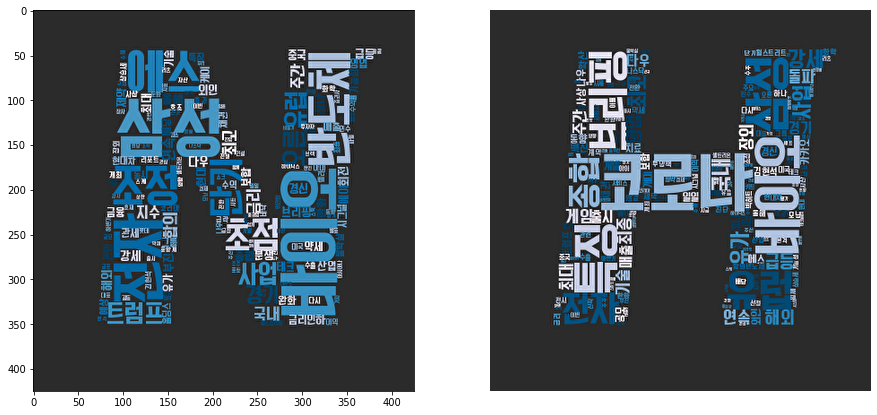

In [ ]:
%matplotlib inline
wc2019 = WordCloud(font_path = 'font.ttf',      
               mask = mask2019,                 
               background_color = "#2b2b2b",  
               max_font_size = 300,         
               margin = 0,                  
               colormap = "PuBu")             
wc2020 = WordCloud(font_path = 'font.ttf',      
               mask = mask2020,                 
               background_color = "#2b2b2b",  
               max_font_size = 300,         
               margin = 0,                  
               colormap = "PuBu")             

cloud2019 = wc2019.generate_from_frequencies(word_dict2019) 
cloud2020 = wc2020.generate_from_frequencies(word_dict2020) 

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(cloud2019,interpolation = "sinc")
plt.subplot(1,2,2)
plt.imshow(cloud2020,interpolation = "sinc")
plt.axis("off")
plt.show()

- 왼) 2019년은 **바이오, 삼성, 전자, 반도체, 트럼프, 단기, 유럽** 등의 단어가 많이 출현했으며,</br>
- 오) 2020년은 **코로나, 바이오, 삼성, 브리핑, 유럽, 유가, 치료, 백신, 카카오** 등의 단어가 많이 출현했음을 알 수 있습니다.</br>

** 주식 관련해서 많이 나오는 단어들 ex. 코스닥, 코스피, 증가, 감소 등의 단어들은 제외했습니다.

> 따라서 코로나, 코로나치료제, 백신 등의 영향으로 제약 관련 주식들이 급등하고, 반도체, 삼성과 관련한 이슈가 많았음을 알 수 있습니다. YZ세대의 인기 종목들을 살펴보면 이러한 변화에 비교적 잘 적응하고 사회 전반을 공부하여 똑똑하게 투자하고 있는 것 같습니다. 

------------

# 업종 결론:
1. 세대별 선호 업종에 대한 차이는 크지 않았습니다. 
2. 상위 업종은 상위 매수총금액 종목과 연관성이 큰 것으로 보입니다.
3. 선호 업종은 사회 트렌드에 따라 변화하고, YZ세대는 이를 잘 파악하여 투자하는 것으로 보여집니다.

---------------

# YZ세대 프로파일
**1. 비교적 안정적인 주식 선호** <BR>
**2. 상대적으로 적은 자금력** <BR>
**3. 주가가 낮은 종목 주식 선호** <BR>
**3. 주로 MTS를 이용** <BR>
**4. 주식 이름로 인해 그 브랜드나 품목이 바로 연상되는 주식들에 비교적 높은 관심도**<BR>
**5. 사회 트렌드 잘 파악하여 투자**<BR>

--------------------

# 🎁저희는 이렇듯 앞서 도출한 인사이트들을 통해 YZ세대를 저격할 새로운 서비스를 제안하고자 합니다. 

## 4. Service
<img src = "https://lh3.googleusercontent.com/pw/ACtC-3fhrkR2B7FmTtYllAKXdNPaD2NXdvFuW5VwiR4684HK2ichyi6A7vhBT8pTmRfSFV8s6lzEt_iZ0mhHJec90XJphz3eGr44Oddlb3KOeFPoqRIbVDU54D4__co2K0ZiNss0j6hDluLUVK5x9t-GTJd3=w800-h450-no?authuser=0" width ="900" /></br></br>
**YZ세대는 자금이 많지 않아, 비교적 가격이 저렴한 주식을 매매하는 경향**이 있습니다.</br>
따라서 본인이 가진 자금 내에서 **살 수 있는 주식의 가격대를 설정하고, 이 안에서 사람들이 많이 매매하고 있는 종목과 업종, 주요제품, 재무제표 등의 정보를 제공**하여 주식을 살 수 있도록 하는 서비스를 제안합니다. </br></br>

대시보드의 위쪽 상단에는 **주문날짜 범위를 설정**할 수 있도록 하고, **체결가격도 범위**를 설정합니다.</br> 가격범위에서 한번이라도 그 가격에 체결된 종목이 있다면 나타나도록 설정하고, 매수 카운트를 기준으로 내림차순 정렬하여 많이 매수된 종목을 알려줍니다. **색은 체결가격을 기준으로 비쌀 수록 진하게 설정했습니다. </br>
실제 서비스로 구현될 때는 현재가격과 재무제표, 뉴스 등의 정보를 추가한다면 더 좋은 서비스가 될 것으로 기대합니다.**

<img src = "https://lh3.googleusercontent.com/pw/ACtC-3dCnJClbtvPW_pAFAQNTKKxOSVPPMkjrRwl3GyB67j1VJKOvwOQwCdCbhtCbfPydRciICj6s43bAqwJQI8i1Q3Yx1gqCOZML3lcw0BF09t3rT-hEuTzAGfbYlz87ENHB6RFmkLyJOCs7Op5vK8v96d1=w1366-h768-no?authuser=0" width ="900" /></br>

뭐든지 **개인 맞춤형으로 누리는 YZ세대** 답게, 이젠 종목 추천도 개인 맞춤형으로 누리는 서비스를 제안합니다.<br>
해당 서비스는 **금융 마이데이터**를 결합하여, 자신의 지갑을 열게 한 기업들과 연관 종목들을 추천해주는 서비스입니다.<br><br>
일상생활 속 소비 (옷, 노트북, 핸드폰, 백화점, 등), 그 모든 것과 투자를 연결지어 제품을 생산하는 기업, 그 제품의 부품과 관련된 기업을 보여주고,
기업의 재무제표, 주가, 관련 뉴스 등의 정보를 제공하여 자신의 체험과 공식적인 정보들을 연결지어 종합적 판단이 가능하게 합니다.<br>
특히, YZ세대는 재미를 추구하고, 짧고 쉽게 즐기는 것을 선호하는 경향이 있기 때문에 해당 서비스가 YZ에게 투자를 재미있게 느끼게 하는 요소가 될 것입니다.<br>
또한 주식은 어렵다는 이미지를 탈피하고, 자신의 선택에 근거를 가지고 건강한 투자를 할 수 있도록 장려할 수 있습니다.<br><br>
투자의 대가들이 이와 같이 **일상 속에서 투자 아이디어를 얻는 것처럼**, 바쁜 현대인이 놓친 인사이트를 캐치할 수 있도록 해당 서비스가 도울 것입니다.<br>

--------------------------

이러한 서비스를 제안하게 된 배경은 다음과 같습니다. 

1) EDA를 통해 알아본 Y&Z세대의 특징
 - 저렴한 주식 선호
 - 안정적인 주식 선호
 - 일상생활에서 자주 접할 수 있는 주식 종목들에 관심

2) 투자의 대가들의 일상 속 투자 아이디어
 - 피터린치의 생활 속 투자 '일상 속에서 투자할 종목을 찾아라'
 - 워렌버핏의 소비주 투자 '우리 생활과 밀접한 제품을 생산하는 기업에 투자'

3) YZ세대, 꼼꼼히 따져보고 소비
 - 자신이 소비한 품목들을 보고, 이 품목을 사게 된 이유, 관련 마케팅, 브랜드 이미지 등을 종합하여 해당 브랜드와 관련된 주식의 진가를 발견할 수 있습니다.

4) 자본과 경험이 적은 YZ세대, 유튜브, 뉴스, 리포트 등의 채널을 통해 공부
 - 자신과 관련이 없는 종목에 대한 설명을 듣는 것보다 자신이 경험하고 관심있는 종목들이 더 잘 이해됩니다.

5) YZ세대, 자기자신에 집중하는 경향이 다른 세대보다 뚜렷하고 자신의 일상을 공유
 - 자신이 소비하는 품목과 브랜드, 이와 관련해 돌아가는 전반적인 경제상황을 보는 것이 재미있는 요소가 될 것입니다.
 - 자신이 소비하는 품목과 브랜드를 공유하고 이와 관련한 주식을 사는 것, 이것이 실제 수익으로 이어지는 것을 인스타그램에 공유하는 재미도 더해질 수 있을 것입니다.